In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pickle
import numpy as np

In [83]:
df = pd.read_csv("model_avgs.csv")

In [84]:
df.rename( columns={'Unnamed: 0':'Model_Type'}, inplace=True )
df["Model_Type"] = df["Model_Type"].str.replace("Model", "").str.strip()

In [85]:
# Add Avg ST Cons to dataset
avg_st_cons = []

for model in df["Model_Type"]:
    with open(f'pkls/tree_const_m{model}.pkl', 'rb') as f:
        tree_const = pickle.load(f)
    avg_st_cons.append(np.mean(tree_const).round(2))

df["avg_st_con"] = avg_st_cons

In [86]:
model_colors = {
    "2": "tab:green",
    "3": "tab:purple",
    "4": "firebrick",
    "4b": "maroon",
    "5": "tab:olive",
    "5b": "gold",
    "6": "tab:orange",
    "7": "black",
    "8": "tab:cyan",
    "9": "lightcoral",
    "9b": "indianred",
    "10": "tab:blue",
    "10b": "cornflowerblue",
    "11": "lightgreen",
    "11b": "forestgreen",
    "11c": "darkgreen"
}
colors = df["Model_Type"].map(model_colors)

In [87]:
# Real Data
rd_avg_deg = 5.4
with open(f'pkls/tree_const_real.pkl', 'rb') as f:
        tree_const = pickle.load(f)
        rd_st_cons = np.mean(tree_const)

/var/folders/2w/nf45dfcn5c9cqf954vr1lz3r0000gn/T/ipykernel_84351/3220728854.py:4: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'Real Data', (rd_st_cons, rd_avg_deg), textcoords="offset pixels")


Text(0.5, 1.0, 'Avg Deg versus Avg ST Cons by Model')

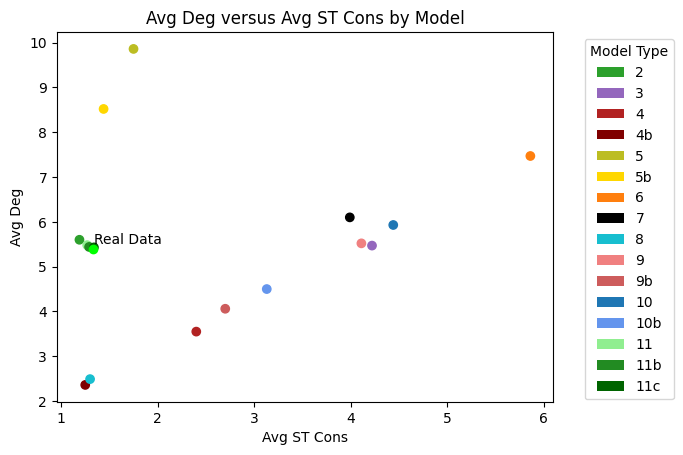

In [88]:
plt.scatter(x=df["avg_st_con"], y=df["avg_deg"], c=colors)

plt.scatter(x=rd_st_cons, y=rd_avg_deg, c="lime")
plt.annotate(f'Real Data', (rd_st_cons, rd_avg_deg), textcoords="offset pixels")

plt.xlabel("Avg ST Cons")
plt.ylabel("Avg Deg")
legend_elements = [Patch(facecolor=color, label=label) for label, color in model_colors.items()]
plt.legend(handles=legend_elements, title="Model Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Avg Deg versus Avg ST Cons by Model")

In [89]:
df

,Model_Type,planar,connected,avg_deg,median_deg,max_deg,avg_st_con
0,2,0.00,1.0,5.60,5.41,11.18,1.19
1,3,1.00,1.0,5.47,5.45,9.21,4.22
2,4,1.00,1.0,3.55,3.55,7.04,2.40
3,4b,1.00,1.0,2.36,2.16,5.21,1.25
4,5,0.00,1.0,9.86,9.80,16.79,1.75
5,5b,0.09,1.0,8.52,8.35,15.04,1.44
6,6,0.00,1.0,7.47,7.37,12.43,5.86
7,7,0.00,1.0,6.10,5.91,11.47,3.99
8,8,0.47,1.0,2.49,2.00,7.13,1.30
9,9,0.00,1.0,5.52,5.41,9.74,4.11
